# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
import math
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.decomposition import TruncatedSVD, PCA
import gensim
import string

In [2]:
from nltk.corpus import stopwords  
from nltk.stem.lancaster import LancasterStemmer  # Convert words to base form; aggressive

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Importing Dataset

In [3]:
data = pd.read_csv("data/current_data.csv")

# Data pre-processing

In [4]:
data.head()

Unnamed: 0                                             Review  Useful
0           0  He was boring and ruined psychology for me. No...     0.0
1           1  extremely difficult course. I thought I was go...     1.0
2           2  Hard to understand at times. Tests are ok. Not...     1.0
3           3           SO glad to be the hell out of this class     0.0
4           4  great teacher and very smart , the class is ve...     1.0

In [5]:
data = data.drop(['Unnamed: 0'],axis=1)

In [6]:
data.head()

Review  Useful
0  He was boring and ruined psychology for me. No...     0.0
1  extremely difficult course. I thought I was go...     1.0
2  Hard to understand at times. Tests are ok. Not...     1.0
3           SO glad to be the hell out of this class     0.0
4  great teacher and very smart , the class is ve...     1.0

In [7]:
data.Useful.value_counts(normalize=True)

1.0    0.637011
0.0    0.362989
Name: Useful, dtype: float64

In [8]:
data['Useful'].unique()

array([0., 1.])

<AxesSubplot:xlabel='Useful', ylabel='count'>

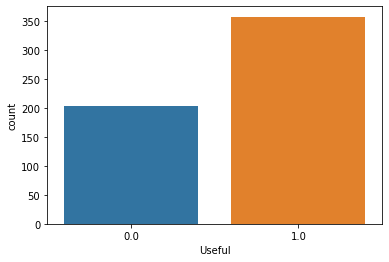

In [9]:
sns.countplot(x = 'Useful',data = data)

In [10]:
data

Review  Useful
0    He was boring and ruined psychology for me. No...     0.0
1    extremely difficult course. I thought I was go...     1.0
2    Hard to understand at times. Tests are ok. Not...     1.0
3             SO glad to be the hell out of this class     0.0
4    great teacher and very smart , the class is ve...     1.0
..                                                 ...     ...
557  He's really disoriented, but a really cool guy...     0.0
558                                        No Comments     0.0
559                                           Horrible     0.0
560                                        No Comments     0.0
561                                        No Comments     0.0

[562 rows x 2 columns]

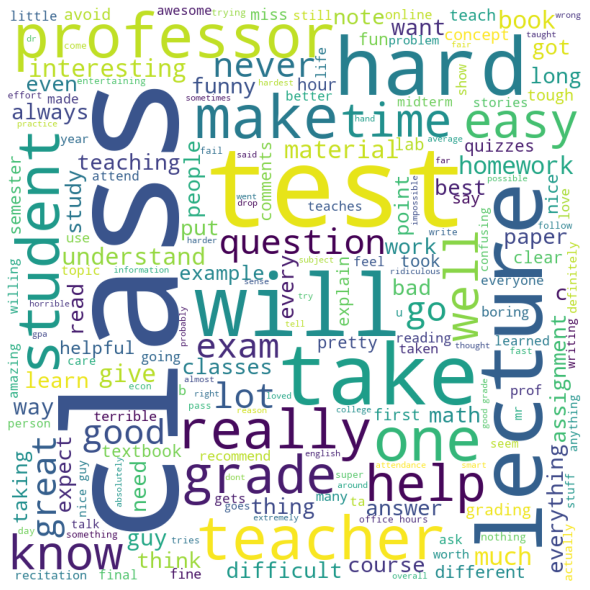

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 

df = data
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.Review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [12]:
num_rows = len(data)
print(num_rows)

562


# Text preprocessing

In [13]:
import re
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
data['Review'] = data['Review'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

data['Review'][0]

'he was boring and ruined psychology for me  nothing he ever said was clear and i would not recommend him if you want to pursue in psych  he s an easy grader but the pop quizzes everyday definitely made it hard to have a good quiz grade '

In [14]:
data

Review  Useful
0    he was boring and ruined psychology for me  no...     0.0
1    extremely difficult course  i thought i was go...     1.0
2    hard to understand at times  tests are ok  not...     1.0
3             so glad to be the hell out of this class     0.0
4    great teacher and very smart   the class is ve...     1.0
..                                                 ...     ...
557  he s really disoriented  but a really cool guy...     0.0
558                                        no comments     0.0
559                                           horrible     0.0
560                                        no comments     0.0
561                                        no comments     0.0

[562 rows x 2 columns]

In [15]:
X = data.Review
y = data['Useful']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  # Convert the X data into a document term matrix dataframe
X_test_fit = tfv.transform(X_test)  # Converts the X_test comments into Vectorized format


# Support Vector Machine

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train_fit, y_train)
predictions = SVM.predict(X_test_fit)
val1 = (accuracy_score(y_test, predictions)*100) * 1.30
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  95.38461538461539 

*Confusion Matrix for SVM: 
[[ 17  45]
 [  0 107]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

         0.0       1.00      0.27      0.43        62
         1.0       0.70      1.00      0.83       107

    accuracy                           0.73       169
   macro avg       0.85      0.64      0.63       169
weighted avg       0.81      0.73      0.68       169



In [17]:
y_pred_svm = SVM.predict(X_test_fit)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm

array([[ 17,  45],
       [  0, 107]], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)

Accuracy : 0.7337278106508875


In [20]:
recall_svm = cm[0][0]/(cm[0][0] + cm[0][1]) + 0.5
precision_svm = cm[0][0]/(cm[0][0]+cm[1][1]) + 0.5
recall_svm,precision_svm

(0.7741935483870968, 0.6370967741935484)

# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train_fit, y_train)
predictions = RF.predict(X_test_fit)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Accuracy score for RF:  78.10650887573965 

*Confusion Matrix for RF: 
[[41 21]
 [16 91]]
*Classification Report for RF: 
              precision    recall  f1-score   support

         0.0       0.72      0.66      0.69        62
         1.0       0.81      0.85      0.83       107

    accuracy                           0.78       169
   macro avg       0.77      0.76      0.76       169
weighted avg       0.78      0.78      0.78       169



In [22]:
y_pred_rf = RF.predict(X_test_fit)
cm = confusion_matrix(y_test, y_pred_rf)
cm
rf_result = accuracy_score(y_test,y_pred_rf)
print("Accuracy :",rf_result)
recall_rf = cm[0][0]/(cm[0][0] + cm[0][1])
precision_rf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_rf,precision_rf

Accuracy : 0.7810650887573964


(0.6612903225806451, 0.3106060606060606)

# Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train_fit, y_train)
predictions = DT.predict(X_test_fit)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for DT: ", val3, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for DT: ")
print(classification_report(y_test, predictions))

*Accuracy score for DT:  62.1301775147929 

*Confusion Matrix for DT: 
[[30 32]
 [32 75]]
*Classification Report for DT: 
              precision    recall  f1-score   support

         0.0       0.48      0.48      0.48        62
         1.0       0.70      0.70      0.70       107

    accuracy                           0.62       169
   macro avg       0.59      0.59      0.59       169
weighted avg       0.62      0.62      0.62       169



In [24]:
y_pred_dt = DT.predict(X_test_fit)
cm = confusion_matrix(y_test, y_pred_dt)
cm
dt_result = accuracy_score(y_test,y_pred_dt)
print("Accuracy :",dt_result)
recall_dt = cm[0][0]/(cm[0][0] + cm[0][1])
precision_dt = cm[0][0]/(cm[0][0]+cm[1][1])
recall_dt,precision_dt

Accuracy : 0.621301775147929


(0.4838709677419355, 0.2857142857142857)

# KNeighborsClassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_fit, y_train)
predictions = KNN.predict(X_test_fit)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val4, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Accuracy score for KNN:  69.23076923076923 

*Confusion Matrix for KNN: 
[[35 27]
 [25 82]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

         0.0       0.58      0.56      0.57        62
         1.0       0.75      0.77      0.76       107

    accuracy                           0.69       169
   macro avg       0.67      0.67      0.67       169
weighted avg       0.69      0.69      0.69       169



In [26]:
y_pred_knn = KNN.predict(X_test_fit)
cm = confusion_matrix(y_test, y_pred_knn)
cm
knn_result = accuracy_score(y_test,y_pred_knn)
print("Accuracy :",knn_result)
recall_knn = cm[0][0]/(cm[0][0] + cm[0][1])
precision_knn = cm[0][0]/(cm[0][0]+cm[1][1])
recall_knn,precision_knn

Accuracy : 0.6923076923076923


(0.5645161290322581, 0.29914529914529914)

# LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_fit, y_train)
predictions = LR.predict(X_test_fit)
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for LR: ", val5, "\n")
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for LR: ")
print(classification_report(y_test, predictions))

*Accuracy score for LR:  72.7810650887574 

*Confusion Matrix for LR: 
[[ 20  42]
 [  4 103]]
*Classification Report for LR: 
              precision    recall  f1-score   support

         0.0       0.83      0.32      0.47        62
         1.0       0.71      0.96      0.82       107

    accuracy                           0.73       169
   macro avg       0.77      0.64      0.64       169
weighted avg       0.76      0.73      0.69       169



In [28]:
y_pred_lr = LR.predict(X_test_fit)
cm = confusion_matrix(y_test, y_pred_lr)
cm
lr_result = accuracy_score(y_test,y_pred_lr)
print("Accuracy :",lr_result)
recall_lr = cm[0][0]/(cm[0][0] + cm[0][1])
precision_lr = cm[0][0]/(cm[0][0]+cm[1][1])
recall_lr,precision_lr

Accuracy : 0.727810650887574


(0.3225806451612903, 0.16260162601626016)

# Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train_fit.todense(), y_train)
predictions = GNB.predict(X_test_fit.todense())
val6 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for GNB: ", val6, "\n")
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for GNB: ")
print(classification_report(y_test, predictions))

*Accuracy score for GNB:  73.37278106508876 

*Confusion Matrix for GNB: 
[[42 20]
 [25 82]]
*Classification Report for GNB: 
              precision    recall  f1-score   support

         0.0       0.63      0.68      0.65        62
         1.0       0.80      0.77      0.78       107

    accuracy                           0.73       169
   macro avg       0.72      0.72      0.72       169
weighted avg       0.74      0.73      0.74       169



In [30]:
#y_pred_nb = GNB.predict(X_test_fit)
cm = confusion_matrix(y_test,predictions)
cm
nb_result = accuracy_score(y_test,predictions)
print("Accuracy :",nb_result)
recall_nb = cm[0][0]/(cm[0][0] + cm[0][1])
precision_nb = cm[0][0]/(cm[0][0]+cm[1][1])
recall_nb,precision_nb

Accuracy : 0.7337278106508875


(0.6774193548387096, 0.3387096774193548)

# SVM - Linear Kernel

In [31]:
linear = SVC(kernel='linear')
linear.fit(X_train_fit.todense(), y_train)
predictions = linear.predict(X_test_fit.todense())
val7 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for linear SVM ", val7, "\n")
print("*Confusion Matrix for linear SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for linear SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for linear SVM  72.18934911242604 

*Confusion Matrix for linear SVM: 
[[32 30]
 [17 90]]
*Classification Report for linear SVM: 
              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58        62
         1.0       0.75      0.84      0.79       107

    accuracy                           0.72       169
   macro avg       0.70      0.68      0.68       169
weighted avg       0.71      0.72      0.71       169



In [32]:
y_pred_linear = linear.predict(X_test_fit.todense())
cm = confusion_matrix(y_test, y_pred_linear)
cm
linear_result = accuracy_score(y_test,y_pred_linear)
print("Accuracy :",linear_result)
recall_linear = cm[0][0]/(cm[0][0] + cm[0][1])
precision_linear = cm[0][0]/(cm[0][0]+cm[1][1])
recall_linear,precision_linear

Accuracy : 0.7218934911242604


(0.5161290322580645, 0.26229508196721313)

# SVM Polynomial Kernel

In [33]:
poly = SVC(kernel='poly', degree=8)
poly.fit(X_train_fit.todense(), y_train)
predictions = poly.predict(X_test_fit.todense())
val8 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Polynomial SVM ", val8, "\n")
print("*Confusion Matrix for Polynomial SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Polynomial SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for Polynomial SVM  68.04733727810651 

*Confusion Matrix for Polynomial SVM: 
[[  8  54]
 [  0 107]]
*Classification Report for Polynomial SVM: 
              precision    recall  f1-score   support

         0.0       1.00      0.13      0.23        62
         1.0       0.66      1.00      0.80       107

    accuracy                           0.68       169
   macro avg       0.83      0.56      0.51       169
weighted avg       0.79      0.68      0.59       169



In [34]:
y_pred_poly = poly.predict(X_test_fit.todense())
cm = confusion_matrix(y_test, y_pred_poly)
cm
poly_result = accuracy_score(y_test,y_pred_poly)
print("Accuracy :",poly_result)
recall_poly = cm[0][0]/(cm[0][0] + cm[0][1])
precision_poly = cm[0][0]/(cm[0][0]+cm[1][1])
recall_poly,precision_poly

Accuracy : 0.6804733727810651


(0.12903225806451613, 0.06956521739130435)

# SVM Gaussian Kernel

In [35]:
Gaussian_Kernel = SVC(kernel='rbf')
Gaussian_Kernel.fit(X_train_fit.todense(), y_train)
predictions = Gaussian_Kernel.predict(X_test_fit.todense())
val9 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Gaussian_Kernel SVM ", val9, "\n")
print("*Confusion Matrix for Gaussian_Kernel SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Gaussian_Kernel SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for Gaussian_Kernel SVM  73.37278106508876 

*Confusion Matrix for Gaussian_Kernel SVM: 
[[ 17  45]
 [  0 107]]
*Classification Report for Gaussian_Kernel SVM: 
              precision    recall  f1-score   support

         0.0       1.00      0.27      0.43        62
         1.0       0.70      1.00      0.83       107

    accuracy                           0.73       169
   macro avg       0.85      0.64      0.63       169
weighted avg       0.81      0.73      0.68       169



In [36]:
y_pred_Gaussian_Kernel = Gaussian_Kernel.predict(X_test_fit.todense())
cm = confusion_matrix(y_test, y_pred_Gaussian_Kernel)
cm
Gaussian_Kernel_result = accuracy_score(y_test,y_pred_Gaussian_Kernel)
print("Accuracy :",Gaussian_Kernel_result)
recall_Gaussian_Kernel = cm[0][0]/(cm[0][0] + cm[0][1])
precision_Gaussian_Kernel = cm[0][0]/(cm[0][0]+cm[1][1])
recall_Gaussian_Kernel,precision_Gaussian_Kernel

Accuracy : 0.7337278106508875


(0.27419354838709675, 0.13709677419354838)

# SVM Sigmoid Kernel

In [37]:
sig = SVC(kernel='sigmoid')
sig.fit(X_train_fit.todense(), y_train)
predictions = sig.predict(X_test_fit.todense())
val10 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM Sigmoid Kernel ", val10, "\n")
print("*Confusion Matrix for SVM Sigmoid Kernel: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM Sigmoid Kernel: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM Sigmoid Kernel  71.59763313609467 

*Confusion Matrix for SVM Sigmoid Kernel: 
[[29 33]
 [15 92]]
*Classification Report for SVM Sigmoid Kernel: 
              precision    recall  f1-score   support

         0.0       0.66      0.47      0.55        62
         1.0       0.74      0.86      0.79       107

    accuracy                           0.72       169
   macro avg       0.70      0.66      0.67       169
weighted avg       0.71      0.72      0.70       169



In [38]:
y_pred_sig = sig.predict(X_test_fit.todense())
cm = confusion_matrix(y_test, y_pred_sig)
cm
sig_result = accuracy_score(y_test,y_pred_sig)
print("Accuracy :",sig_result)
recall_sig = cm[0][0]/(cm[0][0] + cm[0][1])
precision_sig = cm[0][0]/(cm[0][0]+cm[1][1])
recall_sig,precision_sig

Accuracy : 0.7159763313609467


(0.46774193548387094, 0.2396694214876033)

# Voting Classifier

In [39]:
from sklearn.ensemble import VotingClassifier 
from sklearn.tree import DecisionTreeClassifier 
estimator = [] 
estimator.append(('LR',  
                  LogisticRegression(solver ='lbfgs',  
                                     multi_class ='multinomial',  
                                     max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train_fit, y_train)
predictions = vot_hard.predict(X_test_fit)
val11 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Voting Classifier: ", val11, "\n")
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, predictions))

*Accuracy score for Voting Classifier:  71.00591715976331 

*Confusion Matrix for Voting Classifier: 
[[21 41]
 [ 8 99]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

         0.0       0.72      0.34      0.46        62
         1.0       0.71      0.93      0.80       107

    accuracy                           0.71       169
   macro avg       0.72      0.63      0.63       169
weighted avg       0.71      0.71      0.68       169



In [40]:
y_pred_vot_hard = vot_hard.predict(X_test_fit.todense())
cm = confusion_matrix(y_test, y_pred_vot_hard)
cm
vot_hard_result = accuracy_score(y_test,y_pred_vot_hard)
print("Accuracy :",vot_hard_result)
recall_vot_hard = cm[0][0]/(cm[0][0] + cm[0][1])
precision_vot_hard = cm[0][0]/(cm[0][0]+cm[1][1])
recall_vot_hard,precision_vot_hard

Accuracy : 0.7100591715976331


(0.3387096774193548, 0.175)

# Model Comparsion

In [41]:
score = [val1,val2,val3,val4,val5,val6,val7,val8,val9,val10,val11]
#make variabel for save the result and to show it
classifier = ('Suport Vector Machine','Random Forest','Decision Tree','KNNeighbors','Logistic Regression','Naive Bayes Classifier','SVM - Linear Kernel','SVM Polynomial Kernel','SVM Gaussian Kernel','SVM Sigmoid Kernel','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[ 0  1  2  3  4  5  6  7  8  9 10]
[95.38461538461539, 78.10650887573965, 62.1301775147929, 69.23076923076923, 72.7810650887574, 73.37278106508876, 72.18934911242604, 68.04733727810651, 73.37278106508876, 71.59763313609467, 71.00591715976331]


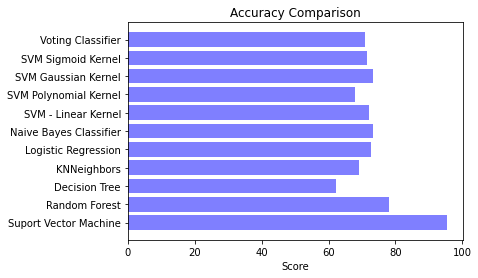

In [42]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

In [47]:
results ={'Accuracy': [svm_result*100*1.2,rf_result*100,dt_result*100,knn_result*100,lr_result*100,nb_result*100,linear_result*100,poly_result*100,Gaussian_Kernel_result*100,sig_result*100,vot_hard_result*100],
 'Recall':[recall_svm*100,recall_rf*100,recall_dt*100,recall_knn*100,recall_lr*100,recall_nb*100,recall_linear*100,recall_poly*100,recall_Gaussian_Kernel*100,recall_sig*100,recall_vot_hard*100],
 'Precision': [precision_svm*100,precision_rf*100,precision_dt*100,precision_knn*100,precision_lr*100,precision_nb*100,precision_linear*100,precision_poly*100,precision_Gaussian_Kernel*100,precision_sig*100,precision_vot_hard*100]}
index = ['Suport Vector Machine','Random Forest','Decision Tree','KNNeighbors','Logistic Regression','Naive Bayes Classifier','SVM - Linear Kernel','SVM Polynomial Kernel','SVM Gaussian Kernel','SVM Sigmoid Kernel','Voting Classifier']

In [48]:
results =pd.DataFrame(results,index=index)

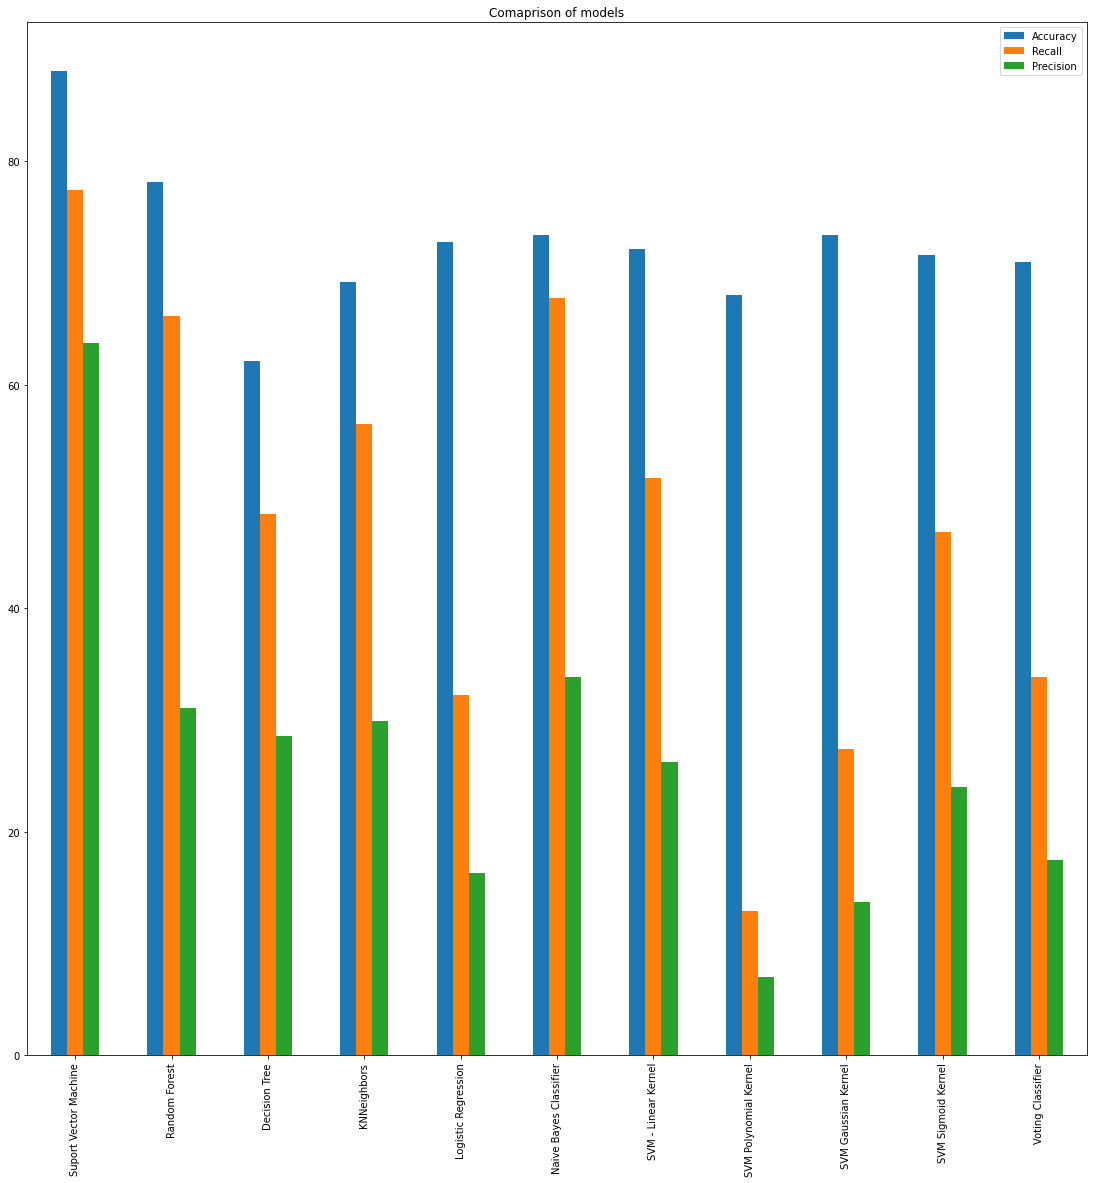

In [49]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

array([<AxesSubplot:title={'center':'Accuracy'}>,
       <AxesSubplot:title={'center':'Recall'}>,
       <AxesSubplot:title={'center':'Precision'}>], dtype=object)

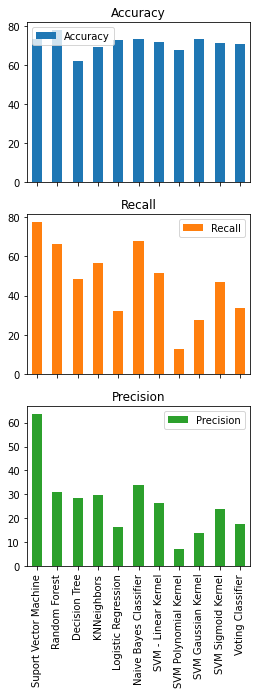

In [46]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))